# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [2]:
!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
  0% 0.00/4.75M [00:00<?, ?B/s]
100% 4.75M/4.75M [00:00<00:00, 181MB/s]
Archive:  bus-breakdown-and-delays.zip
  inflating: Bus_Breakdown_and_Delays.csv  


## Importing Libraries

In [3]:
# NOTE: Sorry for any typos.
# import libraries for DA:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Import preprocessing modules:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score
# Import model and layers
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization # For now we'll only add the dense layer. (In the case of of over fitting we'll add a couple more)
# Add metrics to evalute the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [6]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [7]:
df.sample(5)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
130639,2016-2017,1352239,Pre-K/EI,9320,2,Heavy Traffic,C073,05/24/2017 07:24:00 AM,05/24/2017 07:25:00 AM,Bronx,...,30 minutes,1,Yes,Yes,No,05/24/2017 07:25:00 AM,NaN,05/24/2017 07:25:55 AM,Running Late,Pre-K
9058,2015-2016,1228151,Special Ed AM Run,1492,M966,Heavy Traffic,02347,11/09/2015 07:27:00 AM,11/09/2015 07:28:00 AM,Manhattan,...,1492,2,Yes,Yes,No,11/09/2015 07:28:00 AM,NaN,11/09/2015 07:28:37 AM,Running Late,School-Age
9962,2015-2016,1229116,General Ed PM Run,1516,Q9571,Other,25209,11/12/2015 03:00:00 PM,11/12/2015 03:38:00 PM,Queens,...,45 MINS,50,Yes,No,No,11/12/2015 03:38:00 PM,NaN,11/12/2015 03:38:42 PM,Running Late,School-Age
109822,2016-2017,1331093,Pre-K/EI,419,1,Heavy Traffic,S176,03/16/2017 08:18:00 AM,03/16/2017 08:20:00 AM,Bronx,...,30 minutes,5,Yes,Yes,No,03/16/2017 08:20:00 AM,NaN,03/16/2017 08:20:56 AM,Running Late,Pre-K
86757,2016-2017,1307511,General Ed PM Run,26648,M9259,Mechanical Problem,02158,12/12/2016 01:30:00 PM,12/12/2016 01:58:00 PM,Manhattan,...,NaN,0,Yes,No,Yes,12/12/2016 01:58:00 PM,NaN,12/12/2016 02:34:15 PM,Breakdown,School-Age


In [8]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age
147971,2016-2017,1353046,Project Read PM Run,2530,K617,Other,21436,05/25/2017 04:36:00 PM,05/25/2017 04:37:00 PM,Brooklyn,...,45min,7,Yes,Yes,Yes,05/25/2017 04:37:00 PM,NaN,05/25/2017 04:37:37 PM,Running Late,School-Age


In [9]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [10]:
# Check for missing values:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [11]:
df.shape

(147972, 21)

In [12]:
# Well due to the fact the the feature Incident Number is purly a indexing feature while also having a huge amount of missing values it shall be dropped:
df.drop('Incident_Number', axis = 1, inplace = True)
# And also due to the huge amount of records in our data we'll also drop the rest of the missing values records:
df.dropna(inplace = True)

In [13]:
df.shape
# Well that's nice 120K recordes are good than enough for an ANN model.

(120553, 20)

In [14]:
# Check for duplicates:
df.duplicated().sum()

0

In [15]:
# Check for null strings in our data ex: (na, NA):
for col in df.columns:
  print(f'The unique values for {col}:')
  print(df[col].unique())
  print('-'*100)
# All clear.

The unique values for School_Year:
['2015-2016' '2016-2017' '2017-2018']
----------------------------------------------------------------------------------------------------
The unique values for Busbreakdown_ID:
[1224901 1225098 1215800 ... 1341521 1353044 1353046]
----------------------------------------------------------------------------------------------------
The unique values for Run_Type:
['Pre-K/EI' 'Special Ed AM Run' 'Special Ed PM Run' 'General Ed AM Run'
 'General Ed Field Trip' 'General Ed PM Run' 'Special Ed Field Trip'
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']
----------------------------------------------------------------------------------------------------
The unique values for Bus_No:
['811' '9302' '358' ... '9509' '42067' 'GVC510']
----------------------------------------------------------------------------------------------------
The unique values for Route_Number:
['1' '2' '4' ... '9304' '29AM' '1409B']
------------------------------

In [16]:
# Check if the data types are appropriate:
df.dtypes

,0
School_Year,object
Busbreakdown_ID,int64
Run_Type,object
Bus_No,object
Route_Number,object
Reason,object
Schools_Serviced,object
Occurred_On,object
Created_On,object
Boro,object


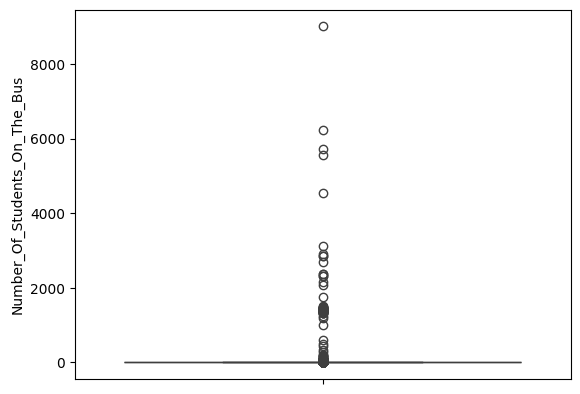

In [17]:
# Before preprocessing our data we'll check for outliers for our numerical features:
fig = sns.boxplot(y = 'Number_Of_Students_On_The_Bus', data = df)

# Well it seems like in our only numeric feature there are indeed outliers, but rather than using our normal function (IQR) for dealing with outliers we'll use the QuantileTransforemr.

In [18]:
# Check if wether our data is evenly ditributed or not:
fig = px.pie(names = 'Breakdown_or_Running_Late', data_frame = df)
fig.show()
# Well if the in the case using smote is needed we'll use it.
# Down below you'll find me using smote in the data splitting.

In [19]:
# Note: Rather than dropping meaningless features like: Bus_No, I'll let the model pick out the
# Preprocessing our data:
# Scaling:
scale = StandardScaler()
QuanSclae = QuantileTransformer()
df['Busbreakdown_ID'] = scale.fit_transform(df[['Busbreakdown_ID']])
df['Number_Of_Students_On_The_Bus'] = QuanSclae.fit_transform(df[['Number_Of_Students_On_The_Bus']]) # This will deal with our outliers.
# Ordenal encoder:
ord = OrdinalEncoder()
# The following features all have an order of which they're kept on.
df['School_Year'] = ord.fit_transform(df[['School_Year']])
df['Occurred_On'] = ord.fit_transform(df[['Occurred_On']])
df['Created_On'] = ord.fit_transform(df[['Created_On']])
df['Informed_On'] = ord.fit_transform(df[['Informed_On']])
df['Last_Updated_On'] = ord.fit_transform(df[['Last_Updated_On']])
df['How_Long_Delayed'] = ord.fit_transform(df[['How_Long_Delayed']])
# Label encoder:
le = LabelEncoder()
df['Run_Type'] = le.fit_transform(df[['Run_Type']])
df['Bus_No'] = le.fit_transform(df[['Bus_No']])
df['Reason'] = le.fit_transform(df[['Reason']])
df['Schools_Serviced'] = le.fit_transform(df[['Schools_Serviced']])
df['Boro'] = le.fit_transform(df[['Boro']])
df['Bus_Company_Name'] = le.fit_transform(df[['Bus_Company_Name']])
df['Route_Number'] = le.fit_transform(df[['Route_Number']])
df['Breakdown_or_Running_Late'] = le.fit_transform(df[['Breakdown_or_Running_Late']]) # Our target
# One hot encoder:
ohe = pd.get_dummies(df[['Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT', 'School_Age_or_PreK']])
df.drop(['Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT', 'School_Age_or_PreK'], axis = 1, inplace = True)
df = pd.concat([df, ohe], axis = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessin

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [20]:
df.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Informed_On', 'Last_Updated_On', 'Breakdown_or_Running_Late',
       'Has_Contractor_Notified_Schools_No',
       'Has_Contractor_Notified_Schools_Yes',
       'Has_Contractor_Notified_Parents_No',
       'Has_Contractor_Notified_Parents_Yes', 'Have_You_Alerted_OPT_No',
       'Have_You_Alerted_OPT_Yes', 'School_Age_or_PreK_Pre-K',
       'School_Age_or_PreK_School-Age'],
      dtype='object')

In [21]:
# Split our data into X and y:
X = df.drop('Breakdown_or_Running_Late', axis = 1)
y = df['Breakdown_or_Running_Late'] # Target feature
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [39]:
# It looks like we need to use SMOTE:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Using SMOTE now our samples are evenly equal. want proof?
from collections import Counter # Counter counts the number of classes in our target:
print(f'The number of classes before smote: {Counter(y_train)}')
print(f'The number of classes after smote: {Counter(y_train_smote)}')
# Well nice that's our under sampiling issue dealt with.

The number of classes before smote: Counter({1: 84380, 0: 7})
The number of classes after smote: Counter({1: 84380, 0: 84380})


In [ ]:
# X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test) # Some issue arises when using smote on our data.

In [22]:
X.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,Informed_On,Last_Updated_On,Has_Contractor_Notified_Schools_No,Has_Contractor_Notified_Schools_Yes,Has_Contractor_Notified_Parents_No,Has_Contractor_Notified_Parents_Yes,Have_You_Alerted_OPT_No,Have_You_Alerted_OPT_Yes,School_Age_or_PreK_Pre-K,School_Age_or_PreK_School-Age
0,0.0,-1.457743,3,6920,73,6,4452,48550.0,52137.0,1,...,52137.0,95310.0,False,True,False,True,True,False,True,False
1,0.0,-1.453187,3,7507,73,3,4515,48811.0,52408.0,1,...,52408.0,95804.0,False,True,False,True,True,False,True,False
2,0.0,-1.668235,3,4314,196,3,4420,41505.0,44402.0,1,...,44402.0,80401.0,False,True,False,True,False,True,True,False
3,0.0,-1.674919,3,4219,196,6,4419,41394.0,44267.0,1,...,44267.0,80191.0,False,True,False,True,False,True,True,False
4,0.0,-1.667588,3,4225,196,6,4587,41508.0,44409.0,1,...,44409.0,80460.0,False,True,False,True,True,False,True,False


## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [23]:
# Initialize our model knowing that an artificial nueral network has three layers.
model = Sequential([
    # Our input layer would have four inputs: (units, input_shape, activation, kernel_initializer)
    Dense(units = 23, input_dim = X_train.shape[1], activation = 'relu', kernel_initializer='uniform'),
    # First hidden layer:
    Dense(32, activation = 'relu'),
    # Second hidden layer:
    Dense(64, activation = 'relu'),
    # Output Layer: (Our units will be one since our prediction is binary (i,e 0 or 1))
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [41]:
# This model is strictly for the SMOTE data:
model_smote = Sequential([
    # Our input layer would have four inputs: (units, input_shape, activation, kernel_initializer)
    Dense(units = 23, input_dim = X_train_smote.shape[1], activation = 'relu', kernel_initializer='uniform'),
    # First hidden:
    Dense(16, activation = 'relu'),
    # Second hidden layer:
    Dense(32, activation = 'relu'),
    # Third hidden layer:
    Dense(64, activation = 'relu'),
    # fourth hidden layer:
    Dense(32, activation = 'relu'),
    # Output Layer: (Our units will be one since our prediction is binary (i,e 0 or 1))
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [24]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [42]:
model_smote.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [25]:
# We'll fit the model without specefying the batch size:
history = model.fit(X_train, y_train, epochs = 10)
# Notes of my model's performance:
# model 1: this thing is either overfitting or im a genius.
# model 1 with smote: welp im not a genius.
# model 2 with smote: IM A GENUIS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Epoch 1/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9876 - loss: 7.5623
Epoch 2/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9999 - loss: 0.0975
Epoch 3/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9998 - loss: 0.0286
Epoch 4/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9999 - loss: 0.0994
Epoch 5/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9999 - loss: 0.0572
Epoch 6/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9999 - loss: 6.7202e-04
Epoch 7/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9999 - loss: 7.1173e-04
Epoch 8/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9999 - loss: 6.7367e-04
Epoch 9/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9999 - loss: 0.0112
Epoch 10/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9999 - loss: 0.0011


In [40]:
# Let's fit the same model after smote:
history_smote = model.fit(X_train_smote, y_train_smote, epochs = 10)
# Welp im not a genius.
# We'll make a couple more models if the time was enough.

Epoch 1/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5042 - loss: 0.7473
Epoch 2/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.5170 - loss: 0.6824
Epoch 3/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5389 - loss: 0.6671
Epoch 4/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5634 - loss: 0.6434
Epoch 5/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6024 - loss: 0.6156
Epoch 6/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6244 - loss: 0.6010
Epoch 7/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6326 - loss: 0.5952
Epoch 8/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6352 - loss: 0.5915
Epoch 9/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5998 - loss: 0.6218
Epoch 10/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6342 - loss: 0.5915


In [43]:
# Let's fit the second model after smote:
history_smote2 = model_smote.fit(X_train_smote, y_train_smote, epochs = 10)
# IM A GENUIS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Epoch 1/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7142 - loss: 1.8697
Epoch 2/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8591 - loss: 0.3668
Epoch 3/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8898 - loss: 0.2837
Epoch 4/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9149 - loss: 0.2293
Epoch 5/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9188 - loss: 0.2251
Epoch 6/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9262 - loss: 0.2059
Epoch 7/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9107 - loss: 0.2707
Epoch 8/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9255 - loss: 0.2146
Epoch 9/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9335 - loss: 0.1904
Epoch 10/10
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9424 - loss: 0.1699


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [28]:
model.evaluate(X_test, y_test)
# Im a genius.

1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9999 - loss: 8.1046e-04


[0.0011446261778473854, 0.9998893737792969]

In [48]:
# Evaluate the model after smote:
model_smote.evaluate(X_test, y_test)
# Perfect

1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9323 - loss: 0.1663


[0.16263969242572784, 0.933943510055542]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [31]:
y_pred = model.predict(X_test)
# Down bellow you'll find the visualization of our prediction

1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [49]:
y_pred = model_smote.predict(X_test)

1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

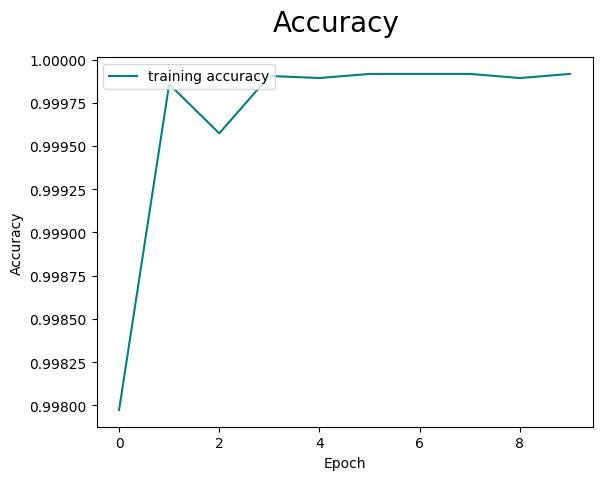

In [30]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='training accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

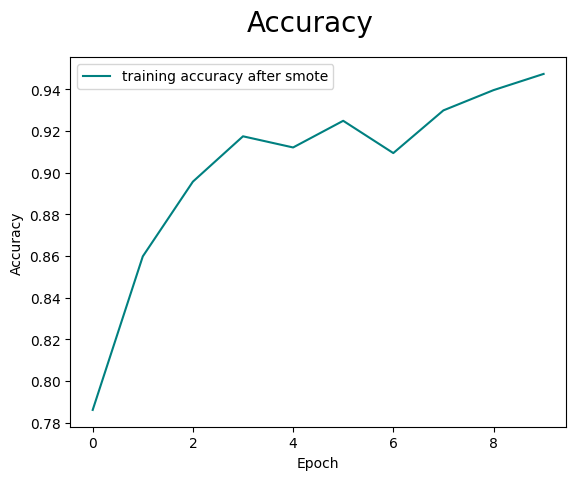

In [45]:
fig = plt.figure()
plt.plot(history_smote2.history['accuracy'], color='teal', label='training accuracy after smote')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [33]:
# Well let's visualise our performance:
# Bofore visualizing we must round the value of our y_pred:
y_pred = np.round(y_pred)
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00     36162

    accuracy                           1.00     36166
   macro avg       0.50      0.50      0.50     36166
weighted avg       1.00      1.00      1.00     36166



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Well let's visualise our performance:
# Bofore visualizing we must round the value of our y_pred:
y_pred = np.round(y_pred)
class_report = classification_report(y_test, y_pred)
print(class_report)

<Axes: >

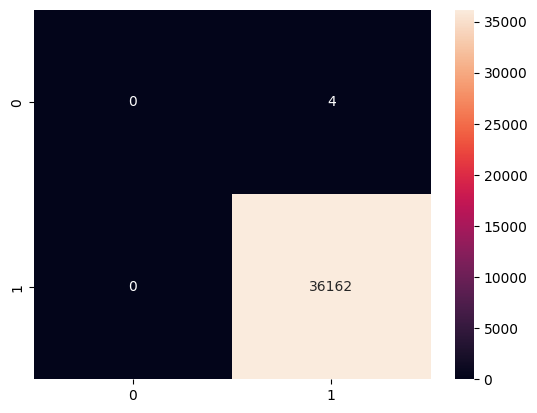

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g')

In [50]:
# SMOTE data ecakutaion:
y_pred = np.round(y_pred)
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.93      0.97     36162

    accuracy                           0.93     36166
   macro avg       0.50      0.47      0.48     36166
weighted avg       1.00      0.93      0.97     36166



<Axes: >

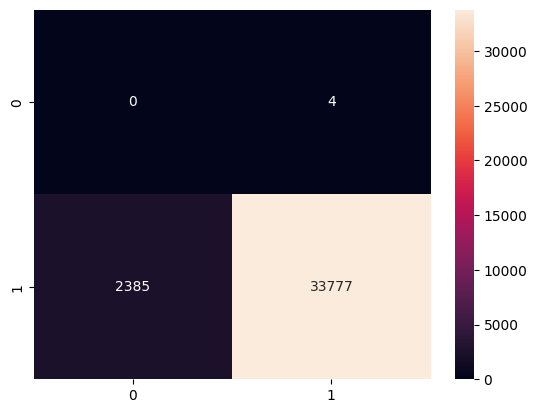

In [51]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g')

## Save the Model
Save the trained model for submission.

In [26]:
model_smote.save("my_model.keras")

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?



*   1-When it comes to the preprocessing techniques picked it was really down down to the data, in my preprocessing step you can find the reasons specefied as to why certian techniques where picked.
*   2-Well my model had 2 hidden layers making the number of layers 4, the actvation functions used were all relu as it stands out as the most generally used and most fitting function.


*   3-The model was trained over 10 epochs with no specefied number of epochs, when compiling the model I used the adam optimizer as a trial and it worked well there is no way to specify the most appropriate optimizer unless you try.


*   4-Since the subject at hand was a clasification case with a binary output I chose the loss function (binary_crossentropy) as it best expresses the accuracy.
*   5-No techniques where used.


*   6-For model evalution I used the clasification report and also the confusion matrix to express the model's performance.




*   7-No tuning was done.
*   8-Due to the major undersampiling in our data we can't really say that this model is good or not, or even underfitting or overfitting, but after using smote and training a second model we could safely say that our model is good enough.





### Answer Here: